In [1]:
import argoverse
import numpy as np
import pandas as pd
import torch
import matplotlib.pylab as plt

/root/miniconda3/envs/lanegcn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = torch.load("results/lanegcn_pimp/results.pkl")
print(data.keys())

dict_keys(['preds', 'gts', 'cities'])


In [3]:
preds = data['preds']
gts = data['gts']

In [4]:
#np.linalg.norm(gts[item].numpy()-preds[item][0], axis=1)

NameError: name 'item' is not defined

In [6]:
def ade_fde(t1, t2):
    de = np.linalg.norm(t1-t2, axis=1)
    fde = de[-1]
    ade = np.mean(de)
    return ade, fde

In [9]:
def display_results(index, horizon=30):
    key = list(preds.keys())[index]
    plt.plot(gts[key][:,0],gts[key][:,1], label="True", linewidth=3)
    for i in range(preds[key].shape[0]):
        ade, fde = ade_fde(preds[key][i][:horizon],gts[key][:horizon].numpy())
        plt.plot(preds[key][i][:horizon,0], preds[key][i][:horizon,1], label=f"Pred {i} | ADE: {ade:.4f}")
        plt.annotate(f"ADE:{ade:.4f}\nFDE:{fde:.4f}", (preds[key][i][horizon-1,0], preds[key][i][horizon-1,1]),
                 xytext=(3,3), textcoords="offset points")
    plt.title(f"Index: {index}")
    plt.legend()

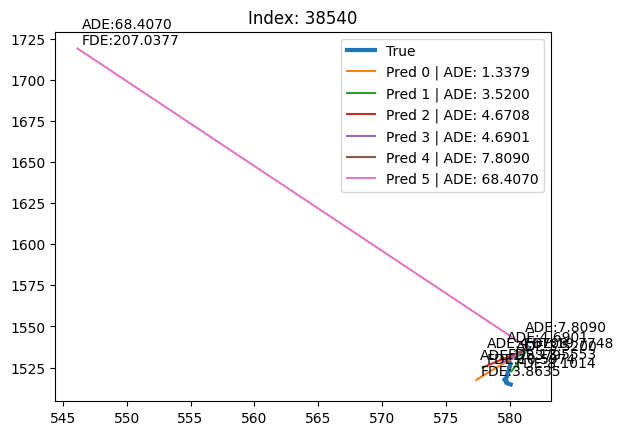

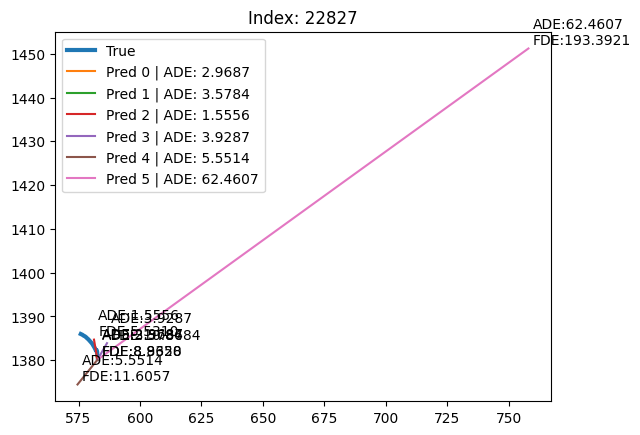

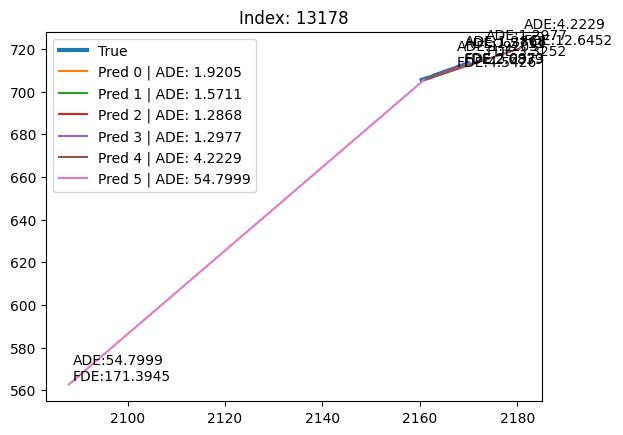

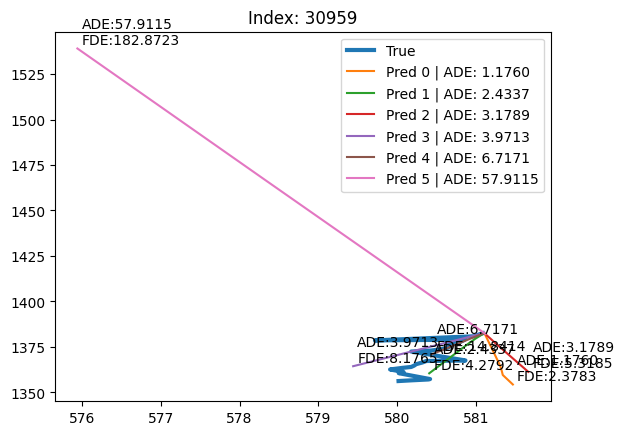

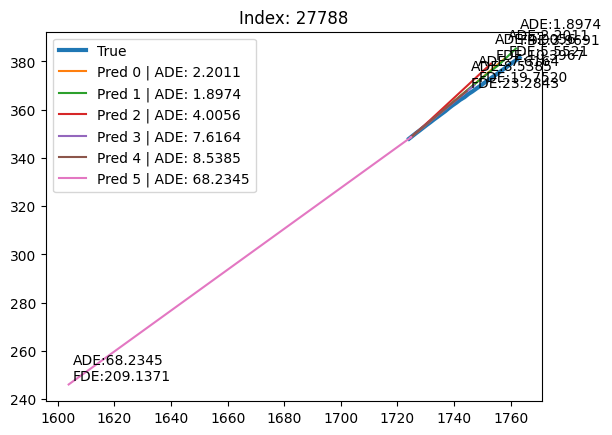

In [12]:
for item in np.random.randint(0,len(preds.keys()),5):
    display_results(item)
    plt.show()